<a href="https://colab.research.google.com/github/HosnawHb/Blood_Glucose_Prediction/blob/main/PreProcessing_of_BG20JULY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import unicode_literals
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import datetime
import csv
import seaborn as sns
from matplotlib import pyplot
import pickle
from sklearn.preprocessing import Normalizer,MinMaxScaler
import tensorflow as tf


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Data Tables CSV/BDataCGM.csv")
df.head(-10)

,RecID,PtID,BCGMDeviceType,BFileType,DeviceDaysFromEnroll,DeviceTm,Glucose,CalBG
0,7393,199,Dexcom,Visit 1,0,17:42:44,NaN,NaN
1,7394,199,Dexcom,Visit 1,0,17:44:05,NaN,NaN
2,7395,199,Dexcom,Visit 1,1,10:08:13,NaN,NaN
3,7396,199,Dexcom,Visit 1,1,22:54:45,NaN,NaN
4,7397,199,Dexcom,Visit 1,2,09:58:59,NaN,NaN
...,...,...,...,...,...,...,...,...
655760,542756,85,Dexcom,Visit 1,4,06:09:34,218.0,NaN
655761,542757,85,Dexcom,Visit 1,4,06:14:34,221.0,NaN
655762,542758,85,Dexcom,Visit 1,4,06:19:34,226.0,NaN
655763,542759,85,Dexcom,Visit 1,4,06:24:33,222.0,NaN


In [ ]:
df.drop(['CalBG','BCGMDeviceType','BFileType'], inplace = True,axis = 1)

In [ ]:
df.dropna(inplace = True)
df.reset_index(inplace=True)

In [ ]:
df = df.sort_values(by=['PtID', 'DeviceDaysFromEnroll','DeviceTm'])

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index','level_0'], inplace = True,axis = 1)

In [ ]:
df

,RecID,PtID,DeviceDaysFromEnroll,DeviceTm,Glucose
0,60482,1,0,18:35:14,223.0
1,60483,1,0,18:40:14,221.0
2,60484,1,0,18:45:14,233.0
3,60485,1,0,18:50:14,223.0
4,60486,1,0,18:55:14,214.0
...,...,...,...,...,...
647853,377950,203,14,21:47:30,401.0
647854,377951,203,14,21:52:30,401.0
647855,377952,203,14,21:57:30,401.0
647856,377953,203,14,22:37:30,401.0


In [ ]:
df['Glucose']

0         223.0
1         221.0
2         233.0
3         223.0
4         214.0
          ...  
647853    401.0
647854    401.0
647855    401.0
647856    401.0
647857    401.0
Name: Glucose, Length: 647858, dtype: float64

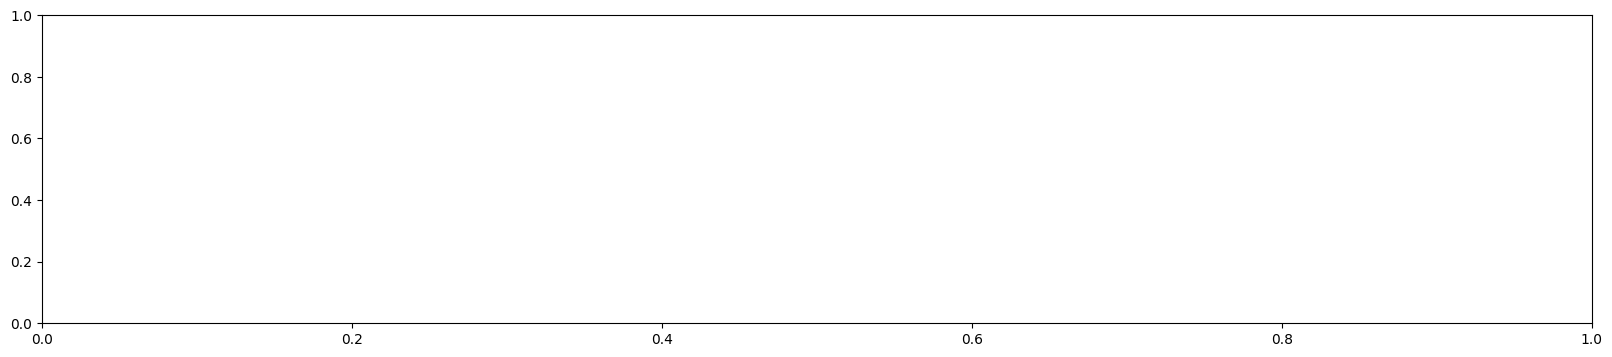

In [ ]:
fig, ax = pyplot.subplots(figsize=(20,4))

In [ ]:
sns.histplot(df['Glucose'], ax = ax)


<Axes: xlabel='Glucose', ylabel='Count'>

<Axes: >

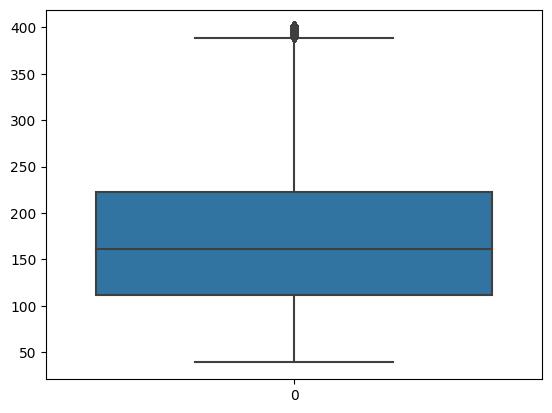

In [ ]:
sns.boxplot(df['Glucose'])


In [ ]:
z = df['PtID'] == 100
z

0         False
1         False
2         False
3         False
4         False
          ...  
647853    False
647854    False
647855    False
647856    False
647857    False
Name: PtID, Length: 647858, dtype: bool

<Axes: title={'center': 'BGP'}>

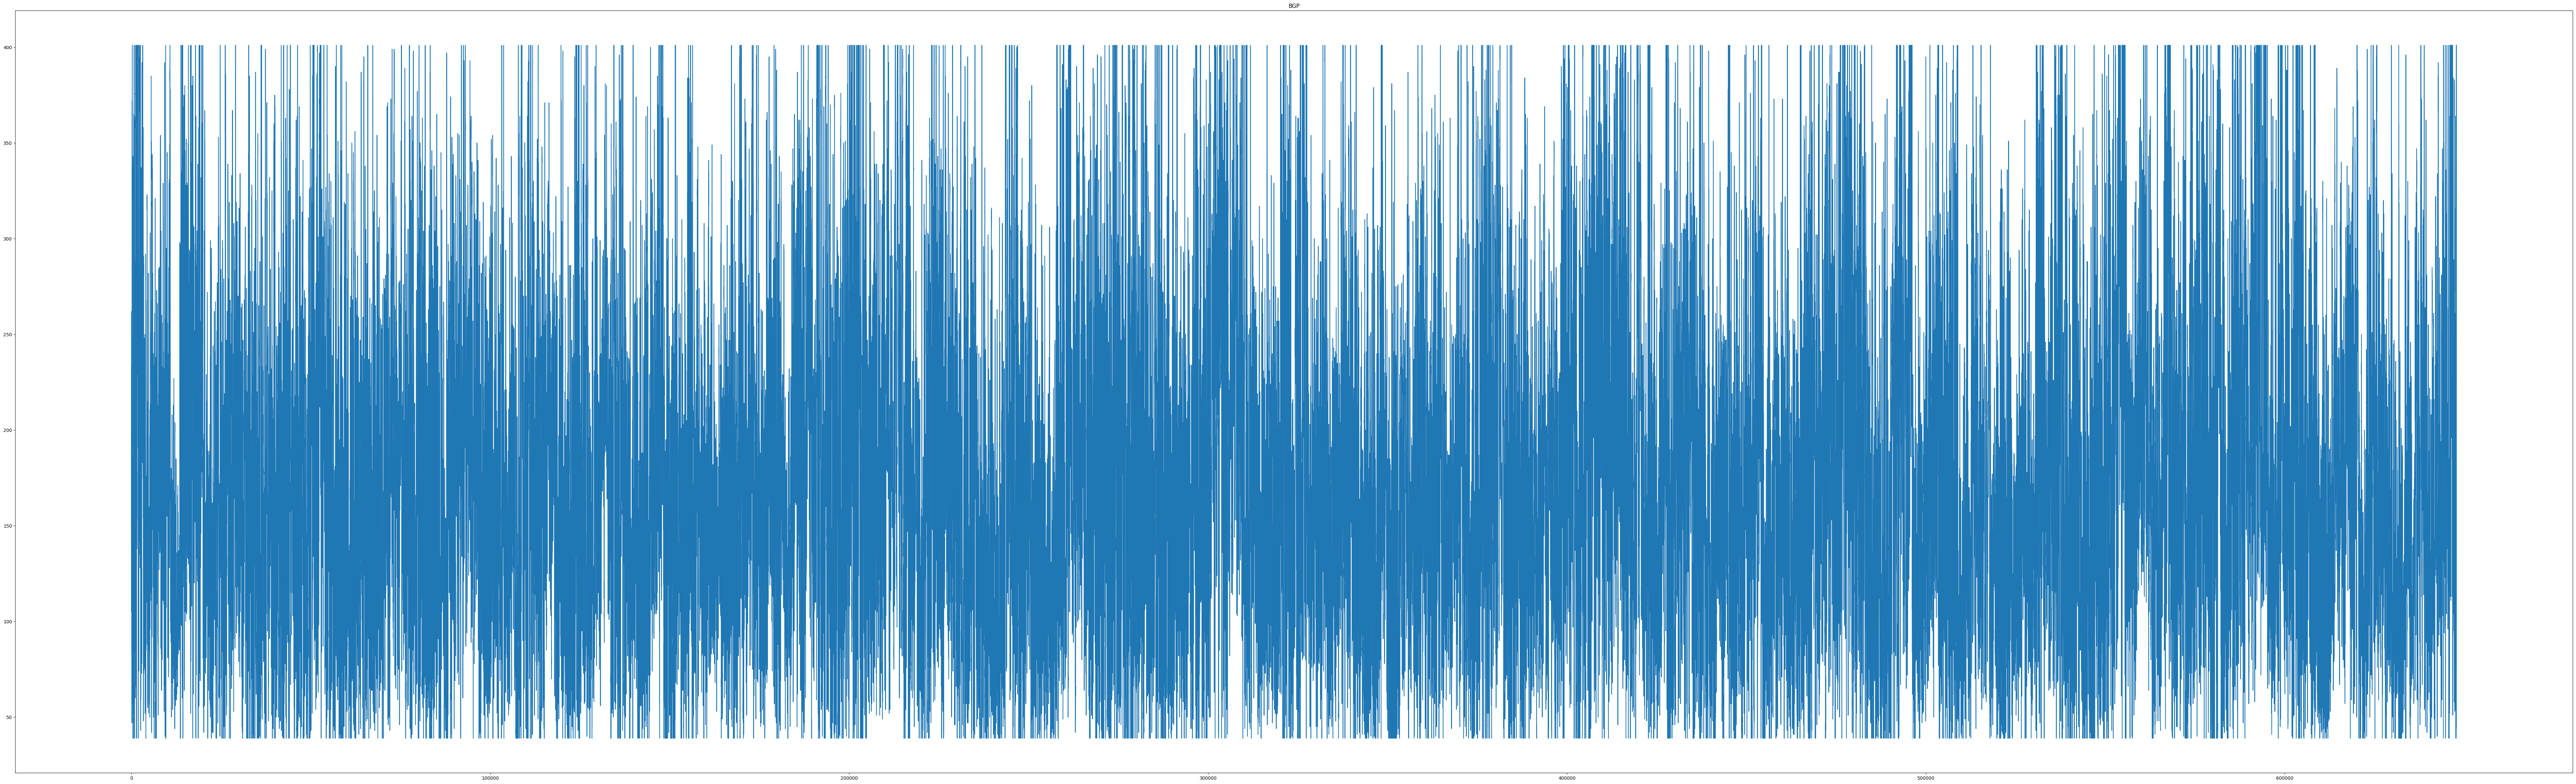

In [ ]:
df['Glucose'].plot(title="BGP",figsize=(100, 30))

<Axes: >

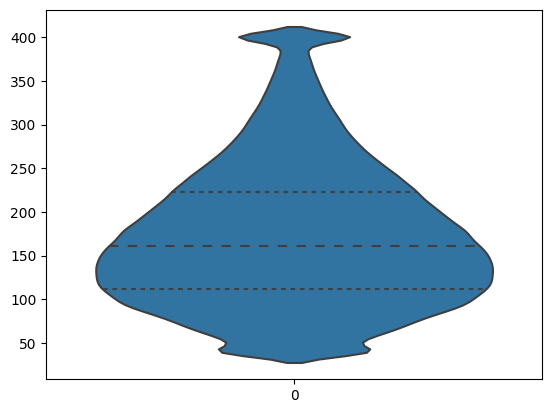

In [ ]:
sns.violinplot(df['Glucose'], inner='quartile')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

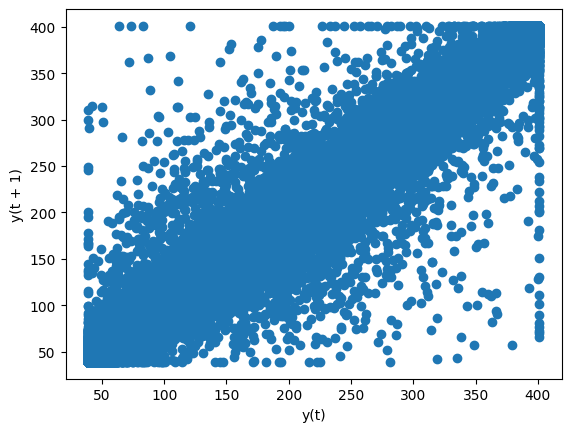

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df['Glucose'], lag=1)


In [ ]:
percentiles = [0, 0.05, .10, .25, .5, .75, .90, .95, 1]
df['Glucose'].describe(percentiles= percentiles)

count    647858.000000
mean        173.863578
std          82.542535
min          39.000000
0%           39.000000
5%           60.000000
10%          77.000000
25%         112.000000
50%         161.000000
75%         223.000000
90%         289.000000
95%         335.000000
100%        401.000000
max         401.000000
Name: Glucose, dtype: float64

In [ ]:
a = [[1,2],[2,4]]
b = [2,4]
if b in a:
  print('yes')

yes


In [ ]:
def CheckSimilarity(X,x_new):
  if x_new in X:
    return False
  return True

In [ ]:
def find_outlier(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  outliers = df[((df < (q1 - 1.5 * iqr))| (df > (q3 + 1.5 * iqr)))]
  return outliers
outliers = find_outlier(df['Glucose'])
print('length of outliers', len(outliers))
print('outliers max', outliers.max())
print('outliers min', outliers.min())


length of outliers 14147
outliers max 401.0
outliers min 390.0


In [ ]:
outliers.index

Int64Index([   227,    228,    229,    230,    231,    233,    235,    750,
               751,    752,
            ...
            647848, 647849, 647850, 647851, 647852, 647853, 647854, 647855,
            647856, 647857],
           dtype='int64', length=14147)

In [ ]:
df.drop(index = outliers.index, inplace = True)
df.reset_index(inplace=True)
df

,index,RecID,PtID,DeviceDaysFromEnroll,DeviceTm,Glucose
0,0,60482,1,0,18:35:14,223.0
1,1,60483,1,0,18:40:14,221.0
2,2,60484,1,0,18:45:14,233.0
3,3,60485,1,0,18:50:14,223.0
4,4,60486,1,0,18:55:14,214.0
...,...,...,...,...,...,...
633706,647819,377916,203,14,18:47:31,374.0
633707,647820,377917,203,14,18:52:31,360.0
633708,647821,377918,203,14,18:57:31,378.0
633709,647822,377919,203,14,19:02:31,384.0


In [ ]:
min(df['Glucose']),max(df['Glucose'])

(39.0, 389.0)

In [ ]:
#x = df['Glucose'].values #returns a numpy array
#min_max_scaler = MinMaxScaler()
#x = np.reshape(x,(-1,1))
#print(x.shape)
#x_scaled = min_max_scaler.fit_transform(x)
#df['Glucose'] = pd.DataFrame(x_scaled)

In [ ]:

#min_max_scaler.transform(x)
#x

In [ ]:
df['Glucose']

0         223.0
1         221.0
2         233.0
3         223.0
4         214.0
          ...  
633706    374.0
633707    360.0
633708    378.0
633709    384.0
633710    386.0
Name: Glucose, Length: 633711, dtype: float64

In [ ]:
pdtt = pd.to_datetime(df['DeviceTm'])

pdtt = pdtt.apply(lambda x : pd.to_datetime(str(x)))

s = pd.DatetimeIndex(pdtt)

df['DeviceTm'] = s

In [ ]:
(df.iloc[1]['PtID'] and df.iloc[2]['PtID'] and df.iloc[10000]['PtID']) == 1

False

In [ ]:
df.iloc[7]['DeviceTm'],df['DeviceTm'][7]

(Timestamp('2023-07-23 19:10:14'), Timestamp('2023-07-23 19:10:14'))

In [ ]:
df[df['PtID'] == 2]

,index,RecID,PtID,DeviceDaysFromEnroll,DeviceTm,Glucose
3098,3327,636429,2,0,2023-07-23 16:39:12,94.0
3099,3328,636430,2,0,2023-07-23 16:44:12,95.0
3100,3329,636431,2,0,2023-07-23 16:49:12,89.0
3101,3330,636432,2,0,2023-07-23 16:54:12,84.0
3102,3331,636433,2,0,2023-07-23 16:59:12,78.0
...,...,...,...,...,...,...
6832,7061,639932,2,14,2023-07-23 12:47:37,117.0
6833,7062,639933,2,14,2023-07-23 12:52:37,118.0
6834,7063,639934,2,14,2023-07-23 12:57:37,119.0
6835,7064,639935,2,14,2023-07-23 13:02:37,115.0


In [ ]:
'''
X = []
y = []
slide_size = 7
X_temp = []
Y_temp = []
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
  for i in df.index:
    print(i)
    slide = []
    flag = True
    try:
     # check for PtID similarity
      for j in range(1,slide_size):
        if df.iloc[i]['PtID'] != df.iloc[i+j]['PtID']:
          flag = False
          #X.append(X_temp)
          #y.append(Y_temp)
          if X_temp:
            X.append(X_temp.copy())
            y.append(Y_temp.copy())
          X_temp.clear()
          Y_temp.clear()
          break

      if flag:
        counter = 0
        for j in range(i, i+slide_size):
          if j == i:
            slide.append(df.iloc[j]['Glucose'])
            continue

          diff_in_minutes = np.round((df.iloc[j]['DeviceTm'] - df.iloc[j-1]['DeviceTm']).total_seconds() / 60)
          if(diff_in_minutes == 5):
            counter = counter + 1
            slide.append(df.iloc[j]['Glucose'])

        if counter == 6:
          for z in range(i+7,i+14):
            time2 =  df['DeviceTm'][z] - df['DeviceTm'][i+6]
            diff_in_minutes_2 = np.round(time2.total_seconds() / 60)
            if(diff_in_minutes_2 == 30):
              X_temp.append(slide)
              Y_temp.append(df['Glucose'][z])
              break


    except:
      continue
  if X_temp:
    X.append(X_temp.copy())
    y.append(Y_temp.copy())
'''

"\nX = []\ny = []\nslide_size = 7\nX_temp = []\nY_temp = []\ntf.debugging.set_log_device_placement(True)\nwith tf.device('/GPU:0'):\n  for i in df.index:\n    print(i)\n    slide = []\n    flag = True\n    try:\n     # check for PtID similarity\n      for j in range(1,slide_size):\n        if df.iloc[i]['PtID'] != df.iloc[i+j]['PtID']:\n          flag = False\n          #X.append(X_temp)\n          #y.append(Y_temp)\n          if X_temp:\n            X.append(X_temp.copy())\n            y.append(Y_temp.copy())\n          X_temp.clear()\n          Y_temp.clear()\n          break\n\n      if flag:\n        counter = 0\n        for j in range(i, i+slide_size):\n          if j == i:\n            slide.append(df.iloc[j]['Glucose'])\n            continue\n\n          diff_in_minutes = np.round((df.iloc[j]['DeviceTm'] - df.iloc[j-1]['DeviceTm']).total_seconds() / 60)\n          if(diff_in_minutes == 5):\n            counter = counter + 1\n            slide.append(df.iloc[j]['Glucose'])\n\n   

In [ ]:
def GroupingAllPateints(slide_size, df, PH):
  X = []
  y = []
  print(slide_size, PH / 5)
  tf.debugging.set_log_device_placement(True)
  with tf.device('/GPU:0'):
    for i in range(len(df.index)):
      if i % 1000 == 0:
        print(i)
      slide = []
      flag = True
      try:

      # check for PtID similarity
        for j in range(1,slide_size):
          if df.iloc[i]['PtID'] != df.iloc[i+j]['PtID']:
            flag = False
            break

        if flag:
          counter = 0
          for j in range(i, i+slide_size):

            if j == i:
              slide.append(df.iloc[j]['Glucose'])
              counter = counter + 1
              continue

            diff_in_minutes = np.round((df.iloc[j]['DeviceTm'] - df.iloc[j-1]['DeviceTm']).total_seconds() / 60)
            if(diff_in_minutes == 5):
              counter = counter + 1
              slide.append(df.iloc[j]['Glucose'])

          if counter == slide_size:
            for z in range(i + slide_size, i + slide_size + int(PH/5)+1):
              time2 =  df['DeviceTm'][z] - df['DeviceTm'][i+slide_size - 1]
              diff_in_minutes_2 = np.round(time2.total_seconds() / 60)
              if(diff_in_minutes_2 == PH and CheckSimilarity(X,slide)):
                X.append(slide)
                del slide
                y.append(df['Glucose'][z])
                break

      except:
        continue
  return X,y

In [ ]:
X ,y = GroupingAllPateints(5, df,15)

504000
505000
506000
507000
508000
509000
510000
511000
512000
513000
514000
515000
516000
517000
518000
519000
520000
521000
522000
523000
524000
525000
526000
527000
528000
529000
530000
531000
532000
533000
534000
535000
536000
537000
538000
539000
540000
541000
542000
543000
544000
545000
546000
547000
548000
549000
550000
551000
552000
553000
554000
555000
556000
557000
558000
559000
560000
561000
562000
563000
564000
565000
566000
567000
568000
569000
570000
571000
572000
573000
574000
575000
576000
577000
578000
579000
580000
581000
582000
583000
584000
585000
586000
587000
588000
589000
590000
591000
592000
593000
594000
595000
596000
597000
598000
599000
600000
601000
602000
603000
604000
605000
606000
607000
608000
609000
610000
611000
612000
613000
614000
615000
616000
617000
618000
619000
620000
621000
622000
623000
624000
625000
626000
627000
628000
629000
630000
631000
632000
633000


In [ ]:
len(X)

477230

In [ ]:
X[2],y[2]

([233.0, 223.0, 214.0, 211.0, 206.0], 198.0)

In [ ]:
with open('X data', 'wb') as outp:

    # Overwrites any existing file.
  pickle.dump(X, outp, pickle.HIGHEST_PROTOCOL)
# sample usage

In [ ]:
len(X)

477230

In [ ]:
with open('y data', 'wb') as outp:

    # Overwrites any existing file.
  pickle.dump(y, outp, pickle.HIGHEST_PROTOCOL)
# sample usage